# Base Model

## Importing Necessary Dependencies

In [2]:
# Python Standard Libraries for importing data from binary file
import os.path #for accessing the file path
import struct  #for unpacking the binary data

import time    #for calculating time
import math

#core packages
import numpy as np
import matplotlib.pyplot as plt

#custom module
from dataPrep import retrive_data, sample_origDataset , dev_test_split, prep_dataset, visualize_orig


np.random.seed(1)
%matplotlib inline

## Dataset Preparation

#### Retriving Dataset

In [3]:
#retriving the data
train_x_orig, train_y_orig = retrive_data(dataset="training-set")
test_x_temp, test_y_temp = retrive_data(dataset="test-set")

#displaying the retrival info
print("Data\t\t\t","Datatype\t\t","Shape")
print("=================================================================")
print("Training Set Images:\t" + str(type(train_x_orig))+"\t",str(train_x_orig.shape))
print("Training Set Labels:\t" + str(type(train_y_orig))+"\t",str(train_y_orig.shape))
print("Test Set Images:\t" + str(type(test_x_temp))+"\t",str(test_x_temp.shape))
print("Test Set Labels:\t" + str(type(test_y_temp))+"\t",str(test_y_temp.shape))
print("=================================================================")


Data			 Datatype		 Shape
Training Set Images:	<class 'numpy.ndarray'>	 (60000, 28, 28)
Training Set Labels:	<class 'numpy.ndarray'>	 (60000, 1)
Test Set Images:	<class 'numpy.ndarray'>	 (10000, 28, 28)
Test Set Labels:	<class 'numpy.ndarray'>	 (10000, 1)


#### Sampling the Dataset for Model Experiment

In [4]:

train_Vol,train_x_sample, train_y_sample = sample_origDataset(train_x_orig,train_y_orig,dataVol= 100)
test_Vol,test_x_sample,test_y_sample = sample_origDataset(test_x_temp,test_y_temp,dataVol= 100)

print("Data\t\t\t","Complete Data Shape\t","Sample Data Shape\t","Sample Size")
print("=====================================================================================")
print("Training Set Images:\t"+ str(train_x_orig.shape)+"\t\t"+ str(train_x_sample.shape)+"\t\t"+str(train_Vol)+"%")
print("Training Set Labels:\t"+ str(train_y_orig.shape)+"\t\t"+ str(train_y_sample.shape))
print("Test Set Images:\t"+str(test_x_temp.shape)+"\t\t"+ str(test_x_sample.shape)+"\t\t"+str(test_Vol)+"%")
print("Test Set Labels:\t"+str(test_y_temp.shape)+"\t\t"+ str(test_y_sample.shape))
print("=====================================================================================")


Data			 Complete Data Shape	 Sample Data Shape	 Sample Size
Training Set Images:	(60000, 28, 28)		(60000, 28, 28)		100%
Training Set Labels:	(60000, 1)		(60000, 1)
Test Set Images:	(10000, 28, 28)		(10000, 28, 28)		100%
Test Set Labels:	(10000, 1)		(10000, 1)


#### Splitting Dev-Test Set

In [5]:
dev_x_orig,dev_y_orig,test_x_orig,test_y_orig = dev_test_split(test_x_sample,test_y_sample)

print("Data\t\t\t","Shape")
print("=================================================================")
print("Dev Set Images:\t\t" ,str(dev_x_orig.shape))
print("Dev Set Labels:\t\t" ,str(dev_y_orig.shape))
print("Test Set Images:\t",str(test_x_orig.shape))
print("Test Set Labels:\t",str(test_y_orig.shape))
print("=================================================================")


Data			 Shape
Dev Set Images:		 (5000, 28, 28)
Dev Set Labels:		 (5000, 1)
Test Set Images:	 (5000, 28, 28)
Test Set Labels:	 (5000, 1)


#### Preparing the Dataset (Flattening and Normalizing)

In [6]:
train_x_norm,train_y_encoded, dev_x_norm,dev_y_encoded, test_x_norm, test_y_encoded = prep_dataset(train_x_sample, train_y_sample, dev_x_orig, dev_y_orig, test_x_orig, test_y_orig)
print("Data\t\t\t","Before Processing\t","After Processing")
print("=================================================================")
print("Training Set Images:\t" + str(train_x_orig.shape)+"\t\t"+ str(train_x_norm.shape))
print("Training Set Labels:\t" + str(train_y_orig.shape)+"\t\t"+ str(train_y_encoded.shape))
print("Dev Set Images:\t\t" + str(dev_x_orig.shape)+"\t\t"+ str(dev_x_norm.shape))
print("Dev Set Labels:\t\t" + str(dev_y_orig.shape)+"\t\t"+ str(dev_y_encoded.shape))
print("Test Set Images:\t" + str(test_x_orig.shape)+"\t\t"+ str(test_x_norm.shape))
print("Test Set Labels:\t" + str(test_y_orig.shape)+"\t\t"+ str(test_y_encoded.shape))
print("=================================================================")

Data			 Before Processing	 After Processing
Training Set Images:	(60000, 28, 28)		(784, 60000)
Training Set Labels:	(60000, 1)		(11, 60000)
Dev Set Images:		(5000, 28, 28)		(784, 5000)
Dev Set Labels:		(5000, 1)		(11, 5000)
Test Set Images:	(5000, 28, 28)		(784, 5000)
Test Set Labels:	(5000, 1)		(11, 5000)


#### Creating Minibatches

In [7]:
def rand_mini_batches(X, Y, mini_batch_size = 64, seed=1):
   
    
    np.random.seed(seed)            
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
#     Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((11,m))

#     Partition (shuffled_X, shuffled_Y) except for the last batch
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size 
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k+1)*mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Last batch (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [8]:
mini_batches = rand_mini_batches(train_x_norm,train_y_encoded, mini_batch_size = 128)
minibatch_length = len(mini_batches)
print("Total Minibatches:\t"+str(minibatch_length))
print("\nMinibatchs\t\tShape")
print("==================================")
print ("1st mini_batch_X:\t" + str(mini_batches[0][0].shape))
print ("2nd mini_batch_X:\t" + str(mini_batches[1][0].shape))
print (str(minibatch_length - 1) + "th mini_batch_X:\t" + str(mini_batches[-2][0].shape))
print (str(minibatch_length) + "th mini_batch_X:\t" + str(mini_batches[-1][0].shape))

print ("\n1st mini_batch_Y:\t" + str(mini_batches[0][1].shape))
print ("2nd mini_batch_Y:\t" + str(mini_batches[1][1].shape)) 
print (str(minibatch_length - 1) + "th mini_batch_Y:\t" + str(mini_batches[-2][1].shape))
print (str(minibatch_length) + "th mini_batch_Y:\t" + str(mini_batches[-1][1].shape))


Total Minibatches:	469

Minibatchs		Shape
1st mini_batch_X:	(784, 128)
2nd mini_batch_X:	(784, 128)
468th mini_batch_X:	(784, 128)
469th mini_batch_X:	(784, 96)

1st mini_batch_Y:	(11, 128)
2nd mini_batch_Y:	(11, 128)
468th mini_batch_Y:	(11, 128)
469th mini_batch_Y:	(11, 96)


## Utility Functions

#### ReLU Function and Its derivative

In [9]:
def relu(Z):
    A = np.maximum(0.0,Z)
    
    cache = Z
    assert(A.shape == Z.shape)
    return A, cache

In [10]:
def relu_grad(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    dZ[Z < 0] = 0
    
    assert(dZ.shape == Z.shape)
    return dZ

#### Softmax Function and its derivative

In [11]:
def softmax(Z):
    shift = Z - np.max(Z) #Avoiding underflow or overflow errors due to floating point instability in softmax
    t = np.exp(shift)
    A = np.divide(t,np.sum(t,axis = 0))
    
    cache = Z
    assert(A.shape == Z.shape)
    return A, cache

#### Learning rate decay

In [ ]:
def decay_learning_rate(alpha_prev, decay_rate = 1, epoch):
    
    alpha = (1/(1 + decay_rate * epoch)) * alpha_prev
    
    return alpha

## Deep Learning Model

### 1. Creating NN Architecture

#### initializing layers

In [51]:
def init_layers():
    layers_dim = [784,800,300,11]
    return layers_dim

#### Initializing Parameters

- Random initialization

In [41]:
def init_params_random(layers_dim):
    
    L = len(layers_dim)
    params = {}
        
    for l in range(1,L):
        params['W' + str(l)] = np.random.randn(layers_dim[l],layers_dim[l-1]) *0.01
        params['b' + str(l)] = np.zeros((layers_dim[l],1))
     
        assert(params['W' + str(l)].shape == (layers_dim[l],layers_dim[l-1]))
        assert(params['b' + str(l)].shape == (layers_dim[l],1))
    return params

- He-initialization

In [14]:
def init_params_he(layers_dim):
    
    L = len(layers_dim)
    params = {}
        
    for l in range(1,L):
        params['W' + str(l)] = np.random.randn(layers_dim[l],layers_dim[l-1]) * np.sqrt(np.divide(2,layers_dim[l-1])) # He - initialization
        params['b' + str(l)] = np.zeros((layers_dim[l],1))
     
        assert(params['W' + str(l)].shape == (layers_dim[l],layers_dim[l-1]))
        assert(params['b' + str(l)].shape == (layers_dim[l],1))
    return params

#### Initializing Hyper Parameters

In [15]:
def init_hyperParams(alpha = 0.001, num_epoch = 2000, mini_batch_size = 128, beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    hyperParams = {}
    hyperParams['learning_rate'] = alpha
    hyperParams['num_epoch'] = num_epoch
    hyperParams['mini_batch_size'] = mini_batch_size
    hyperParams['beta1'] = beta1
    hyperParams['beta2'] = beta2
    hyperParams['epsilon'] = epsilon
    
    return hyperParams

### 2. Forward Propogation

#### Calculating sum of product of inputs and weights (Z) for individual layer

In [16]:
def forward_sum(A,W,b):
    
    Z = np.dot(W,A) + b
    
    cache = (A,W,b)
    assert(Z.shape == (W.shape[0],Z.shape[1]))
    
    return Z, cache

#### Calculating Activation for individual Layer

In [17]:
def forward_activation(A,W,b,activation):
    
    if activation == 'relu':
        Z, sum_cache = forward_sum(A,W,b)
        A, activation_cache = relu(Z)
        
    if activation == 'softmax':
        Z, sum_cache = forward_sum(A,W,b)
        A, activation_cache = softmax(Z)
    
    cache = (sum_cache,activation_cache)
    assert(A.shape == Z.shape)
    
    return A, cache

#### Complete Forward Propagation for L layers

In [18]:
def forward_prop(X,parameters):
    caches = []
    A = X
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = A 
        A, cache = forward_activation(A_prev,parameters['W' + str(l)],parameters['b' + str(l)],activation='relu')
        caches.append(cache)

    AL, cache = forward_activation(A,parameters['W' + str(L)],parameters['b' + str(L)],activation='softmax')
    caches.append(cache)
    
    assert(AL.shape == (11,X.shape[1]))
    
    return AL,caches
    

### 3. Cost Function

In [19]:
def compute_cost(AL,Y):
    m = Y.shape[1]

    cost = -(1./m) * np.sum(np.sum(np.multiply(Y,np.log(AL)), axis = 0,keepdims=True))
    
    
    cost = np.squeeze(cost)      # Making sure your cost's shape is not returned as ndarray
    assert(cost.shape == ())
    
    return cost

### 4. Backward Propagation

#### Calculating Gradients for individual Layer

In [20]:
def backward_grad(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = (1/m) * np.dot(dZ,A_prev.T)
    db = (1/m) * np.sum(dZ, axis = 1, keepdims=True )
    dA_prev = np.dot(W.T, dZ)

    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    
    return dA_prev, dW, db

#### Calculating Backward Activation for individual layer

In [21]:
def backward_activation(dA,cache,activation):
    sum_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_grad(dA,activation_cache)
        dA_prev, dW, db = backward_grad(dZ, sum_cache)
        
    elif activation == "softmax":
        dZ = dA
        dA_prev, dW, db = backward_grad(dA, sum_cache)
    
    return dA_prev, dW, db
    
    

#### Complete Backward Propagation for L layers

In [22]:
def backward_prop(AL, Y,caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    dA = np.subtract(AL,Y)
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = backward_activation(dA, current_cache, activation = 'softmax')
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = backward_activation(grads["dA" + str(l + 1)], current_cache, activation = 'relu')
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

### 5. Update Parameters

- normal update of parameters

In [23]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - (learning_rate * grads["dW" + str(l+1)])
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate * grads["db" + str(l+1)])
    return parameters

- update parameters with adam

In [24]:
#initialize adam

def initialize_adam(parameters) :
   
    L = len(parameters) // 2 
    v = {}
    s = {}
    
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
        s["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        s["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
    
    return v, s

In [25]:
#update with adam
def update_parameters_adam(parameters, grads, learning_rate, v, s, t , beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
       
    L = len(parameters) // 2           
    v_corrected = {}                         
    s_corrected = {}                       
    
    for l in range(L):
        # Moving average of the gradients.
        v["dW" + str(l+1)] = np.add(beta1 * v["dW" + str(l+1)], (1 - beta1) * grads["dW" + str(l+1)])
        v["db" + str(l+1)] = np.add(beta1 * v["db" + str(l+1)], (1 - beta1) * grads["db" + str(l+1)])

        # Compute bias-corrected first moment estimate.
        v_corrected["dW" + str(l+1)] = np.divide(v["dW" + str(l+1)], (1 - np.power(beta1,t)))
        v_corrected["db" + str(l+1)] = np.divide(v["db" + str(l+1)], (1 - np.power(beta1,t)))

        # Moving average of the squared gradients. 
        s["dW" + str(l+1)] = np.add(beta2 * s["dW" + str(l+1)], (1 - beta2) * np.square(grads["dW" + str(l+1)]))
        s["db" + str(l+1)] = np.add(beta2 * s["db" + str(l+1)], (1 - beta2) * np.square(grads["db" + str(l+1)]))

        # Compute bias-corrected second raw moment estimate. 
        s_corrected["dW" + str(l+1)] = np.divide(s["dW" + str(l+1)], (1 - np.power(beta2,t)))
        s_corrected["db" + str(l+1)] = np.divide(s["db" + str(l+1)], (1 - np.power(beta2,t)))

        # Update parameters. 
        parameters["W" + str(l+1)] = np.subtract(parameters["W" + str(l+1)],  learning_rate * np.divide(v_corrected["dW" + str(l+1)], np.sqrt(s_corrected["dW" + str(l+1)]) + epsilon))
        parameters["b" + str(l+1)] = np.subtract(parameters["b" + str(l+1)],  learning_rate * np.divide(v_corrected["db" + str(l+1)], np.sqrt(s_corrected["db" + str(l+1)]) + epsilon))

    return parameters, v, s

### 6.  Prediction 

In [26]:
def predict(X,y,parameters):
    m = y.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    
    probas, caches = forward_prop(X, parameters)
   
    assert(probas.shape == y.shape)
        
    predicted_labels = np.argmax(probas,axis=0).reshape(1,probas.shape[1])
    predicted_prob = np.max(probas,axis = 0).reshape(1,m)
    
    Y = np.argmax(y,axis=0).reshape(1,y.shape[1])
    

    #print results
    true_prediction = np.equal(predicted_labels,Y)
    
    num_correct_labels = np.sum(true_prediction)
    accuracy = (num_correct_labels/m)
        
    return predicted_labels, predicted_prob, accuracy


#### Visualizing the costs and accuracy for model analysis

In [64]:
def visualize_results(attr, attr_type):
    
    plt.plot(np.squeeze(attr))
    if attr_type == 'costs':
        plt.ylabel("cost")
        plt.title("Cost")
        
    elif attr_type == 'train_accs':
        plt.ylabel("accuracy")
        plt.title("Training Accuracy")
        plt.plot(np.squeeze(1 - attr), label = 'loss')
        
        
    elif attr_type == 'val_accs':
        plt.ylabel("accuracy")
        plt.title("Validation Accuracy")
        plt.plot(np.squeeze(1 - attr), label = 'loss')
        
        
    else:
        raise ValueError("Dataset set must be training or dev or test set")
        
    plt.xlabel('Epochs (per hundreds)')
    plt.show()

### 7. Train Model

In [2]:
def train(X_train, Y_train, X_dev, Y_dev, layers_dim, hyperParams, optimizer = 'adam'):
    #hyper parameters
    learning_rate = hyperParams['learning_rate']
    num_epoch = hyperParams['num_epoch']
    mini_batch_size = hyperParams['mini_batch_size']
    beta1 = hyperParams['beta1']
    beta2 = hyperParams['beta2']
    epsilon = hyperParams['epsilon']
    
    seed = 1
    m = Y_train.shape[1]
    costs = []      # keep track of epoch cost    
    train_accs = []  # keep track of training accuracy
    val_accs = []     # keep track of Validation accuracy
    
    parameters = init_params_he(layers_dim)
    
    if optimizer == 'mgd':
        pass
    elif optimizer == 'adam':
        t = 0
        v,s = initialize_adam(parameters)
    
    #minibatch GD
    for i in range(0, num_epoch):
        seed += 1
        minibatches = rand_mini_batches(X_train, Y_train, mini_batch_size, seed)
        epoch_cost = 0
        if i % 10 == 0:
            learning_rate = decay_learning_rate(learning_rate, decay_rate, i)
        
        for minibatch in minibatches:
            
            (minibatch_X, minibatch_Y) = minibatch
            
            AL, caches = forward_prop(minibatch_X, parameters)

            epoch_cost += compute_cost(AL, minibatch_Y) #accumulating the batch costs

            grads = backward_prop(AL, minibatch_Y, caches)

            if optimizer == 'mgd':
                parameters = update_parameters(parameters, grads, learning_rate)
            elif optimizer == 'adam':
                t = t+1
                parameters, v, s = update_parameters_adam(parameters, grads,learning_rate, v, s,t, beta1, beta2,  epsilon)      
            
        epoch_cost_avg = epoch_cost / m
        
        #computing and accumulating training and validation accuracy
        _,_,train_acc = predict(X_train, Y_train, parameters)
        _,_,val_acc= predict(X_dev, Y_dev, parameters)  
        train_accs.append(train_acc)
        val_accs.append(val_acc)

               
#         if i % 50 == 0:
        print("Epoch: %d =========== Learning rate: %f\n"%(i,learning_rate))   
        print ("\tCost: %f || Training acc: %.6f || Val acc: %.6f || Val loss: %.6f"%(epoch_cost_avg,train_acc,val_acc,1-val_acc))
#         if i % 100 == 0:
        costs.append(epoch_cost_avg)
            
            
            
    visualize_results(costs, attr_type='costs') 
    
    visualize_results(train_accs, attr_type='train_accs')       
    visualize_results(val_accs, attr_type='val_accs')       
    
    return parameters

### Running Model

Epoch: 0 == Cost: 0.001734 || Training acc: 0.904550 || Val acc: 0.911600 || Val loss: 0.088400
Epoch: 1 == Cost: 0.000578 || Training acc: 0.933167 || Val acc: 0.937400 || Val loss: 0.062600
Epoch: 2 == Cost: 0.000433 || Training acc: 0.945133 || Val acc: 0.944400 || Val loss: 0.055600
Epoch: 3 == Cost: 0.000358 || Training acc: 0.955283 || Val acc: 0.953600 || Val loss: 0.046400
Epoch: 4 == Cost: 0.000305 || Training acc: 0.961967 || Val acc: 0.957400 || Val loss: 0.042600
Epoch: 5 == Cost: 0.000267 || Training acc: 0.966400 || Val acc: 0.959200 || Val loss: 0.040800
Epoch: 6 == Cost: 0.000235 || Training acc: 0.970433 || Val acc: 0.965800 || Val loss: 0.034200
Epoch: 7 == Cost: 0.000211 || Training acc: 0.973833 || Val acc: 0.967000 || Val loss: 0.033000
Epoch: 8 == Cost: 0.000190 || Training acc: 0.976467 || Val acc: 0.968600 || Val loss: 0.031400
Epoch: 9 == Cost: 0.000172 || Training acc: 0.978950 || Val acc: 0.970000 || Val loss: 0.030000
Epoch: 10 == Cost: 0.000155 || Training 

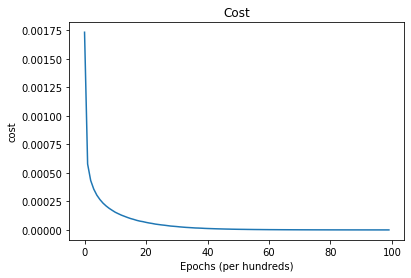

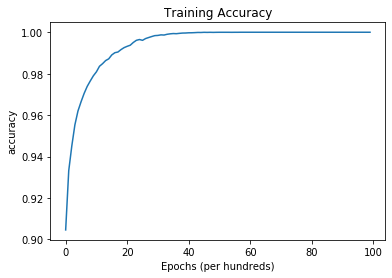

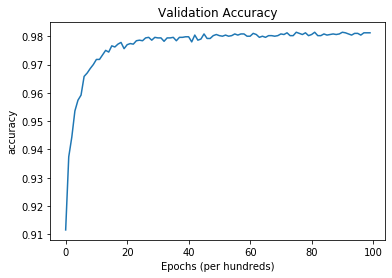

In [52]:
hyperParams = init_hyperParams(alpha = 0.0001, num_epoch = 100, mini_batch_size = 512)
layers_dim = init_layers()
parameters = train(train_x_norm, train_y_encoded,dev_x_norm, dev_y_encoded,layers_dim, hyperParams, optimizer = 'adam')

In [54]:
predicted_labels_train, prediction_prob_train,train_acc = predict(train_x_norm, train_y_encoded,parameters)
print("\nAccuracy: "  + str(train_acc))
print("\nError:\t"+str(1-train_acc))


Accuracy: 1.0

Error:	0.0


In [56]:
predicted_labels_dev, prediction_prob_prob,dev_acc = predict(dev_x_norm, dev_y_encoded,parameters)
print("\nAccuracy: "  + str(dev_acc))
print("\nError:\t"+str(1-dev_acc))


Accuracy: 0.9812

Error:	0.01880000000000004


In [57]:
predicted_labels_test, prediction_prob_prob,test_acc = predict(test_x_norm, test_y_encoded,parameters)
print("\nAccuracy: "  + str(test_acc))
print("\nError:\t"+str(1-test_acc))


Accuracy: 0.9826

Error:	0.01739999999999997


#### Visualizating  Prediction

In [ ]:
def visualize_prediction(x_orig, y_orig, predicted_labels, prediction_prob, dataset):
    if(dataset == "training"):
        visual_title = "Sample Training Data Set"
        rng = range(30,40)
    elif(dataset == "dev"):
        visual_title = "Sample Dev Data Set"
        rng = range(110,120)
    elif(dataset == "test"):
        visual_title = "Sample Test Data Set"
        rng = range(110,120)        
    else:
        raise ValueError("Dataset set must be training or dev or test set")
    fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(16,8))
    fig.subplots_adjust(hspace=1)
    fig.suptitle(visual_title)

    for ax,i in zip(axes.flatten(),rng):
        ax.imshow(x_orig[i].squeeze(),interpolation='nearest', cmap='Greys')
        ax.set(title = "True: "+ str(y_orig[0,i])+" | Predicted: "+str(predicted_labels[0,i]))
        ax.set(xlabel= "Prediction Prob: %f"%(prediction_prob[0,i]))
    

In [ ]:
visualize_prediction(train_x_sample, train_y_sample.T,predicted_labels_train, prediction_prob_train,dataset = "training")

In [ ]:
visualize_prediction(dev_x_orig, dev_y_orig.T, predicted_labels_dev, prediction_prob_prob,dataset = "dev")

In [ ]:
visualize_prediction(test_x_orig, test_y_orig.T, predicted_labels_test, prediction_prob_prob,dataset = "test")

#### Visualizing Mislabelled Images in all datasets

In [58]:
def visualize_mislabelled_images(x_orig,y_orig,predicted_labels,prediction_prob,dataset):
    true_prediction = np.equal(predicted_labels,y_orig)
    mislabelled_indices = np.asarray(np.where(true_prediction == False))
    print("Total Mislabelled Images: "+str(len(mislabelled_indices[0])))
    
    if(dataset == "training"):
        visual_title = "Sample Mislabelled Training Images"
    elif(dataset == "dev"):
        visual_title = "Sample Mislabelled Dev Images"
    elif(dataset == "test"):
        visual_title = "Sample Mislabelled Test Images"
    else:
        raise ValueError("Dataset set must be training or dev or test set")
    
    fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(16,8))
    fig.subplots_adjust(hspace=1)
    fig.suptitle(visual_title)

    for ax,i in zip(axes.flatten(),mislabelled_indices[1]):
        ax.imshow(x_orig[i].squeeze(),interpolation='nearest')
        ax.set(title = "True: "+ str(y_orig[0,i])+" | Predicted: "+str(predicted_labels[0,i]))
        ax.set(xlabel= "Prediction Prob: %f"%(prediction_prob[0,i]))
    

Total Mislabelled Images: 0


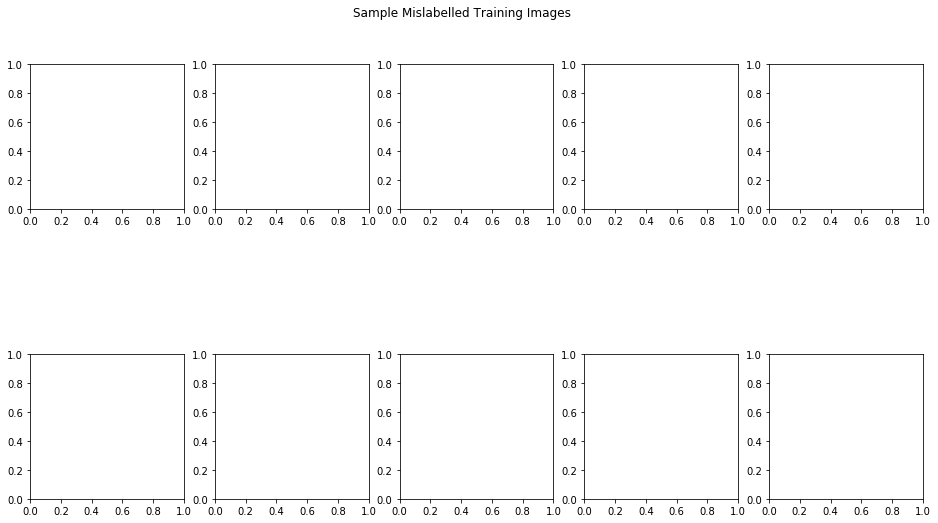

In [59]:
visualize_mislabelled_images(train_x_sample, train_y_sample.T,predicted_labels_train, prediction_prob_train,dataset = "training")

Total Mislabelled Images: 94


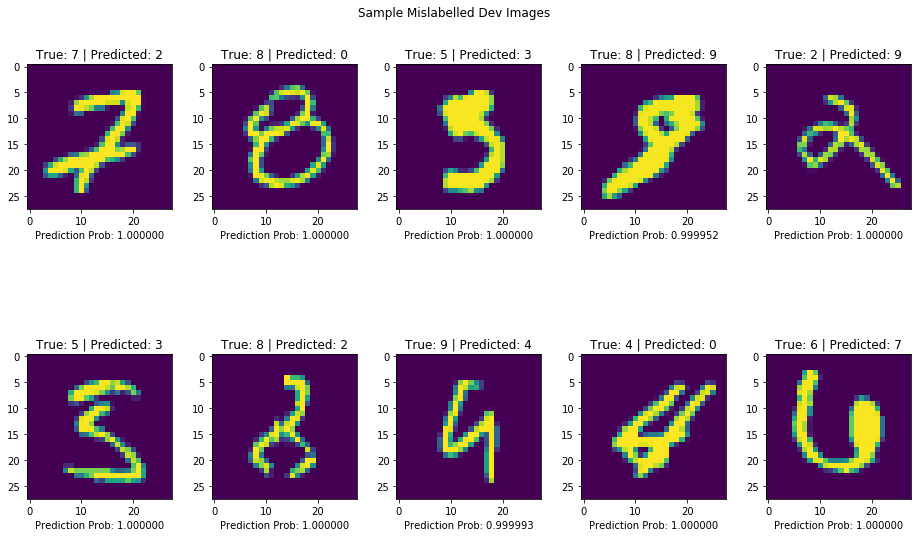

In [60]:
visualize_mislabelled_images(dev_x_orig, dev_y_orig.T, predicted_labels_dev, prediction_prob_prob,dataset = "dev")

Total Mislabelled Images: 87


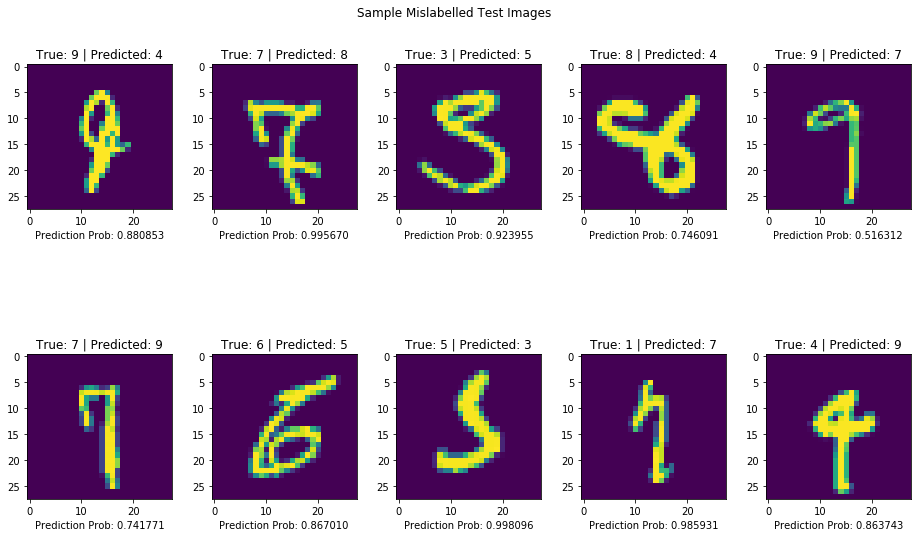

In [61]:
visualize_mislabelled_images(test_x_orig, test_y_orig.T, predicted_labels_test, prediction_prob_prob,dataset = "test")

### Predicting Real Time images

In [62]:
from PIL import Image
from dataPrep import one_hot_encoding

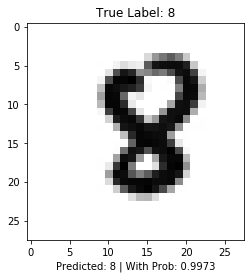

In [63]:
image_name = "8_1.jpg" 
label = np.array([8]).reshape(1,1)

fname = "dataset/" + image_name

image_data =255 - np.asarray(Image.open(fname).convert('L').resize((28,28)))
image_flattened = image_data.reshape(image_data.shape[0]*image_data.shape[1],-1)
image_norm =(image_flattened/255.)

label_encoded = one_hot_encoding(label)

pridected_label,pred_prob,acc = predict(image_norm, label_encoded, parameters)

plt.title("True Label: "+ str(label.squeeze()))
plt.xlabel("Predicted: %d | With Prob: %.4f"%(pridected_label.squeeze(), pred_prob.squeeze()))
plt.imshow(image_data, interpolation ='nearest',cmap='binary')
